# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. **Data Loading and exploration and cleaning**

In [2]:

df = pd.read_csv('googleplaystore.csv')

- Viewing the first five Rows of the data

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [9]:
# check for null values
df['Size'].isnull().sum()

np.int64(0)

- No null values, we are good to go.

In [10]:
# check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [11]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

In [12]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [13]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [14]:
# Total Values in Size column
df['Size'].value_counts().sum()

np.int64(10841)

In [15]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [16]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [17]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [18]:
# Convert to numeric
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

# Create MB column
df['Size_in_Mb'] = df['Size_in_bytes'] / (1024*1024)


- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [19]:
# check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [20]:
# let's have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [21]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10839)

In [22]:
# Total values in Installs column
df['Installs'].value_counts().sum()

np.int64(10841)

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [23]:
# Step 1: Remove + and , characters
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

# Step 2: Convert to numeric safely (invalid values become NaN)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed

In [24]:
df.head() # check the head of the dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [25]:
df['Installs'].dtype # this will show the data type of the column

dtype('float64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [26]:
df['Installs'].max() # this will show the value counts of the column

np.float64(1000000000.0)

In [27]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [28]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

- Let's have a look on the `Price` column

In [29]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [30]:
df['Price'].isnull().sum()

np.int64(0)

- No Null Values

In [31]:
df['Price'].value_counts() # check the value counts of the 'Price' column

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
            ...  
$394.99         1
$1.26           1
Everyone        1
$1.20           1
$1.04           1
Name: count, Length: 93, dtype: int64

- We need to confirm if the values in the `Price` column are only with $ sign or not

In [32]:
# count the values having $ in the 'Price' column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [33]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()


np.int64(10040)

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10041=10841 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [34]:
# Clean and convert the 'Price' column to numeric

# Step 1: Remove the dollar sign ($) from each value
# Example: "$2.99" → "2.99"
df['Price'] = df['Price'].str.replace('$', '', regex=False)

# Step 2: Convert the cleaned values to numeric
# errors='coerce' → converts invalid values (e.g., "Free", "Varies with device") to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 3: Replace NaN values with 0
# This makes free apps have a price of 0 instead of NaN
df['Price'] = df['Price'].fillna(0)


In [35]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [36]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


### **2.1. Descriptive Statistics**

In [37]:
df.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,9.145000e+03,1.084000e+04,10841.000000,9145.000000
mean,4.193338,2.256133e+07,1.546434e+07,1.027273,21.516165
std,0.537431,2.368637e+07,8.502936e+07,15.948971,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000
max,19.000000,1.048576e+08,1.000000e+09,400.000000,100.000000


## Observations:
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
---

- Let's have a look on the missing values in the dataset

In [38]:
df.isnull().sum() # this will show the number of null values in each column

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1696
Installs                1
Type                    1
Price                   0
Content Rating          1
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             3
Size_in_Mb           1696
Installs_category       1
dtype: int64

In [39]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_bytes        1696
Size_in_Mb           1696
Rating               1474
Current Ver             8
Android Ver             3
Type                    1
Installs                1
Installs_category       1
Content Rating          1
App                     0
Category                0
Reviews                 0
Last Updated            0
Price                   0
Genres                  0
dtype: int64

In [40]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

np.int64(4881)

In [41]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_bytes        15.644313
Size_in_Mb           15.644313
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Type                  0.009224
Installs              0.009224
Installs_category     0.009224
Content Rating        0.009224
App                   0.000000
Category              0.000000
Reviews               0.000000
Last Updated          0.000000
Price                 0.000000
Genres                0.000000
dtype: float64

- Let's plot the missing values in the dataset

<Axes: >

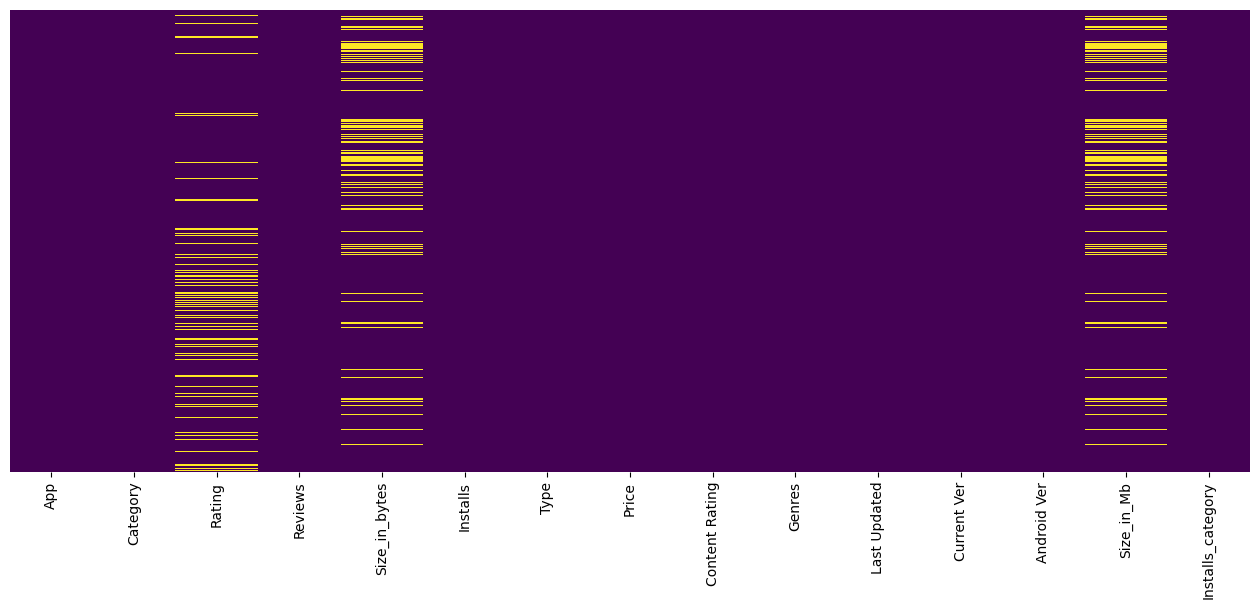

In [42]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

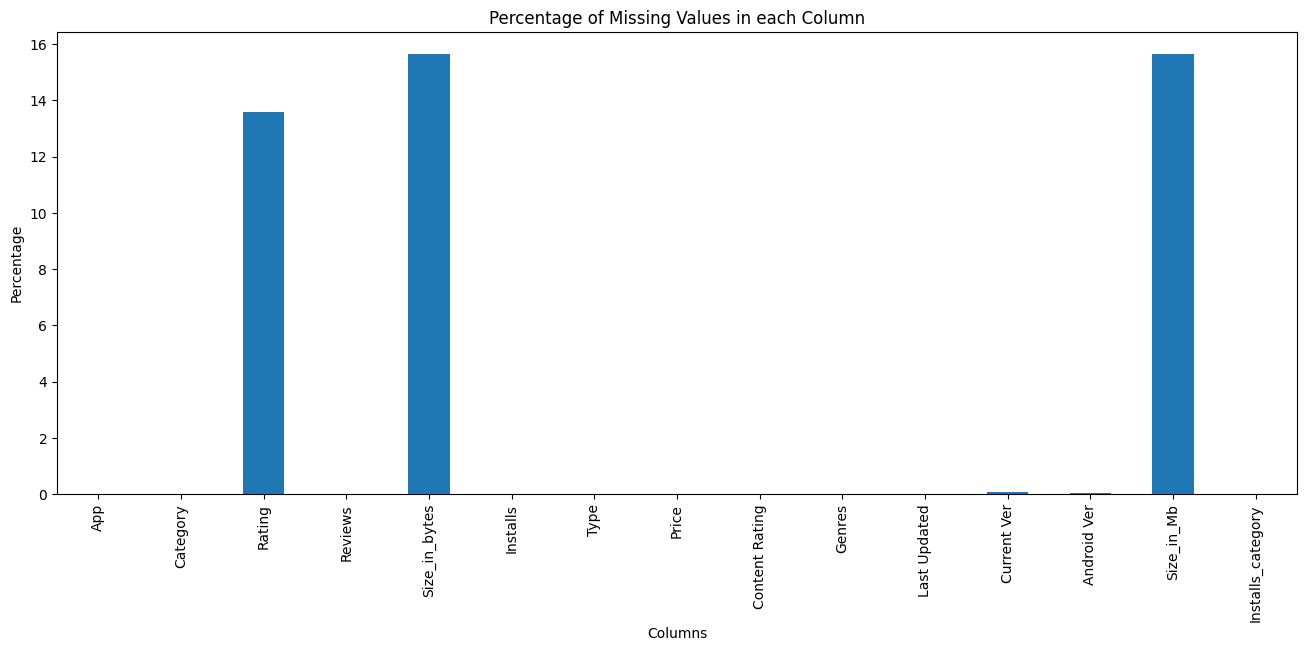

In [43]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

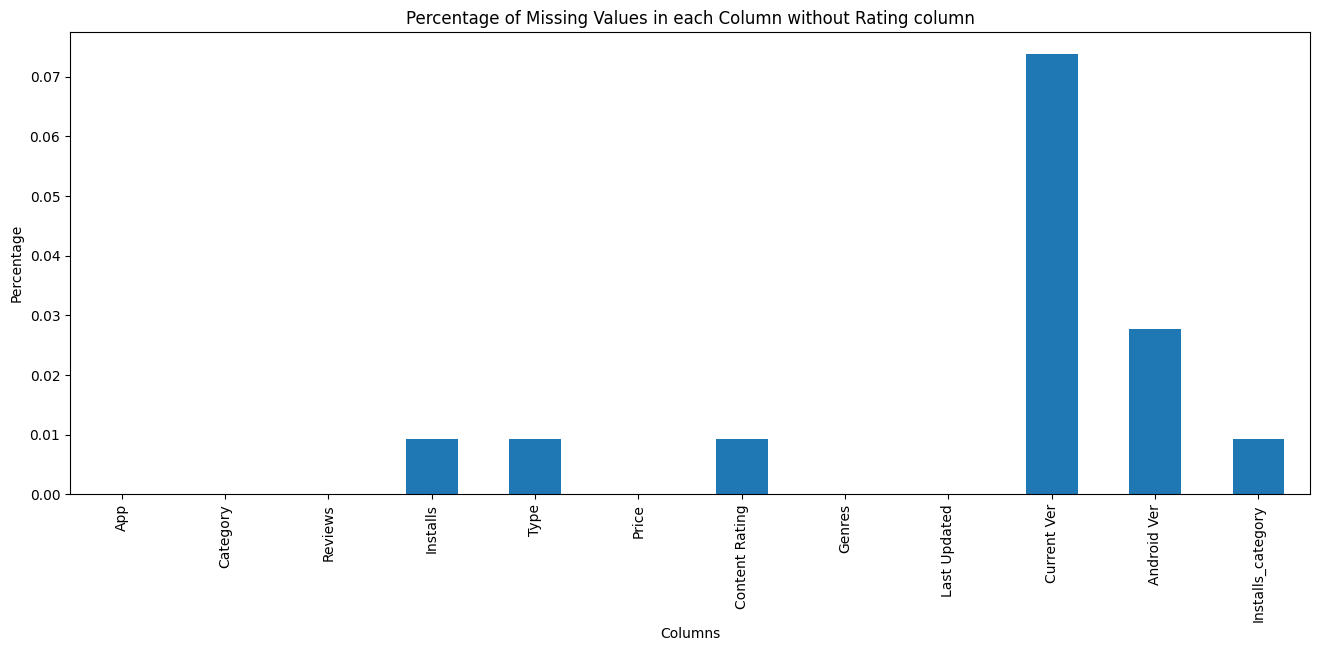

In [44]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

In [45]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_bytes        1696
Size_in_Mb           1696
Rating               1474
Current Ver             8
Android Ver             3
Type                    1
Installs                1
Installs_category       1
Content Rating          1
App                     0
Category                0
Reviews                 0
Last Updated            0
Price                   0
Genres                  0
dtype: int64

In [46]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_bytes        15.644313
Size_in_Mb           15.644313
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Type                  0.009224
Installs              0.009224
Installs_category     0.009224
Content Rating        0.009224
App                   0.000000
Category              0.000000
Reviews               0.000000
Last Updated          0.000000
Price                 0.000000
Genres                0.000000
dtype: float64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [47]:
df.describe() # these are numeric columns

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,9.145000e+03,1.084000e+04,10841.000000,9145.000000
mean,4.193338,2.256133e+07,1.546434e+07,1.027273,21.516165
std,0.537431,2.368637e+07,8.502936e+07,15.948971,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000
max,19.000000,1.048576e+08,1.000000e+09,400.000000,100.000000


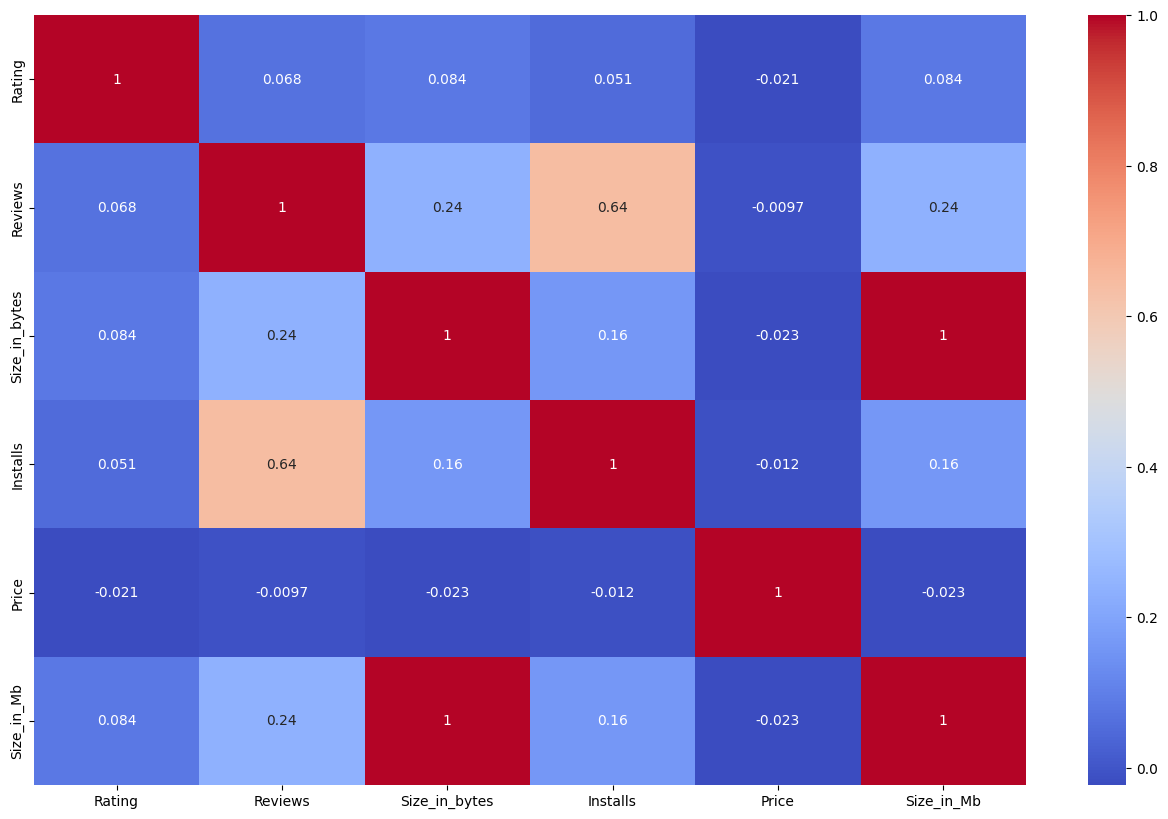

In [48]:
# List of columns we want in correlation matrix
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb']

# Ensure every column is numeric (convert errors to NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where all numeric values are NaN
df_numeric = df[numeric_cols].dropna(how='all')

# Plot correlation heatmap
plt.figure(figsize=(16, 10))  # figure size
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')  # correlation plot
plt.show()

In [49]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068141,0.083737,0.051355,-0.021176,0.083737
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667,0.238214
Size_in_bytes,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689,0.164787
Price,-0.021176,-0.009667,-0.023007,-0.011689,1.000000,-0.023007
Size_in_Mb,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000


In [50]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [51]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [52]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [53]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [54]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [55]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [56]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [57]:
df['Rating'].isnull().sum()

np.int64(1469)

In [58]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

- Let's plot this and have a look

Text(7, 3.5, 'Null values: 0')

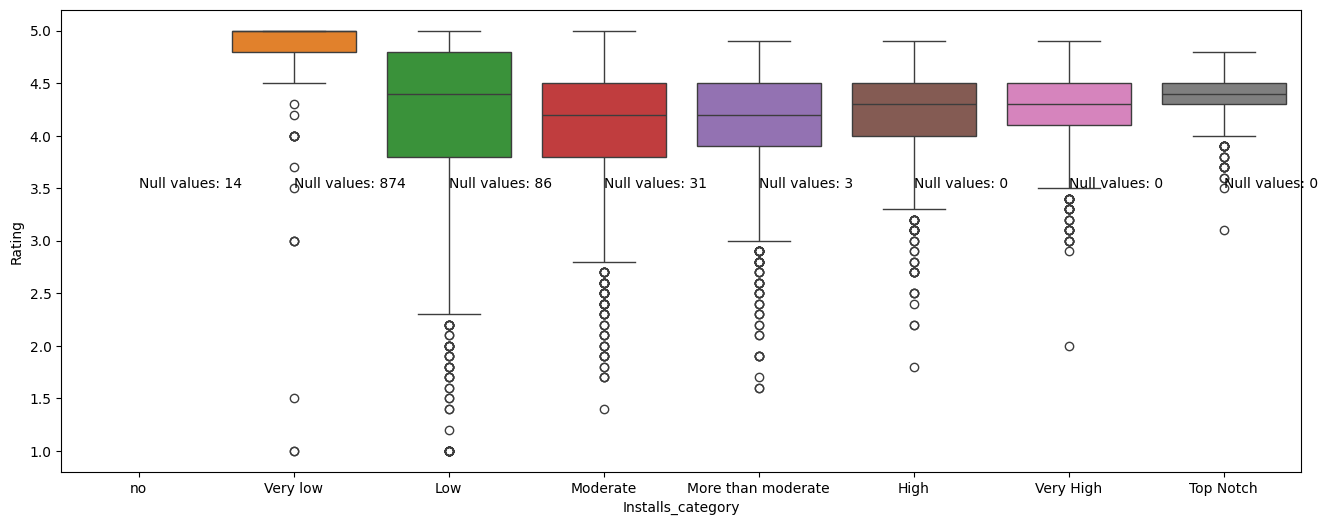

In [59]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well

In [60]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

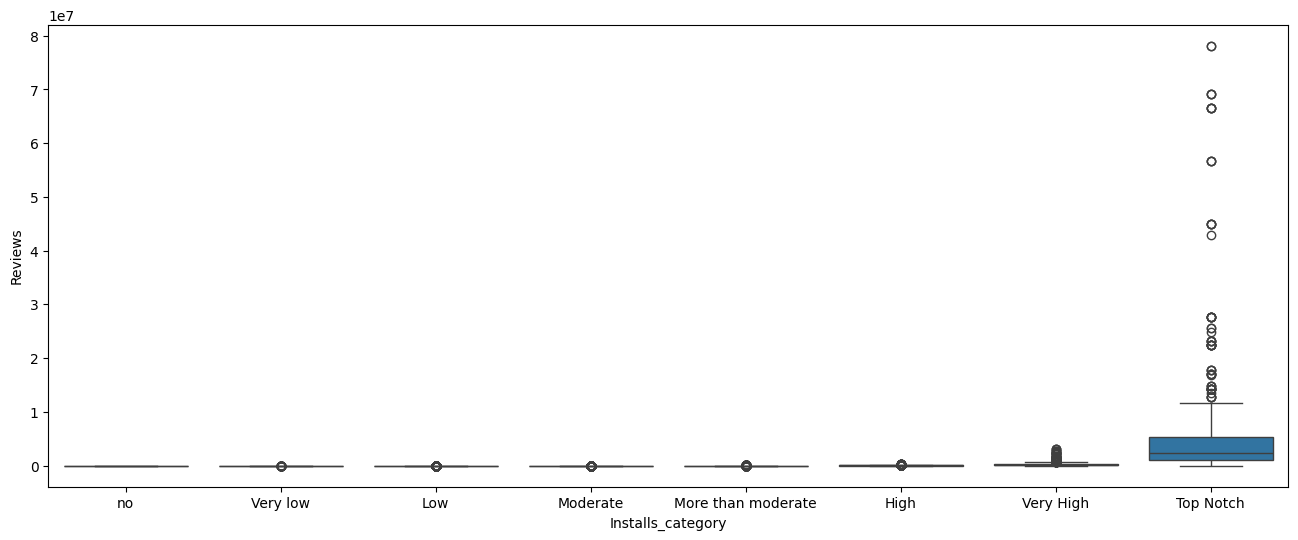

In [61]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

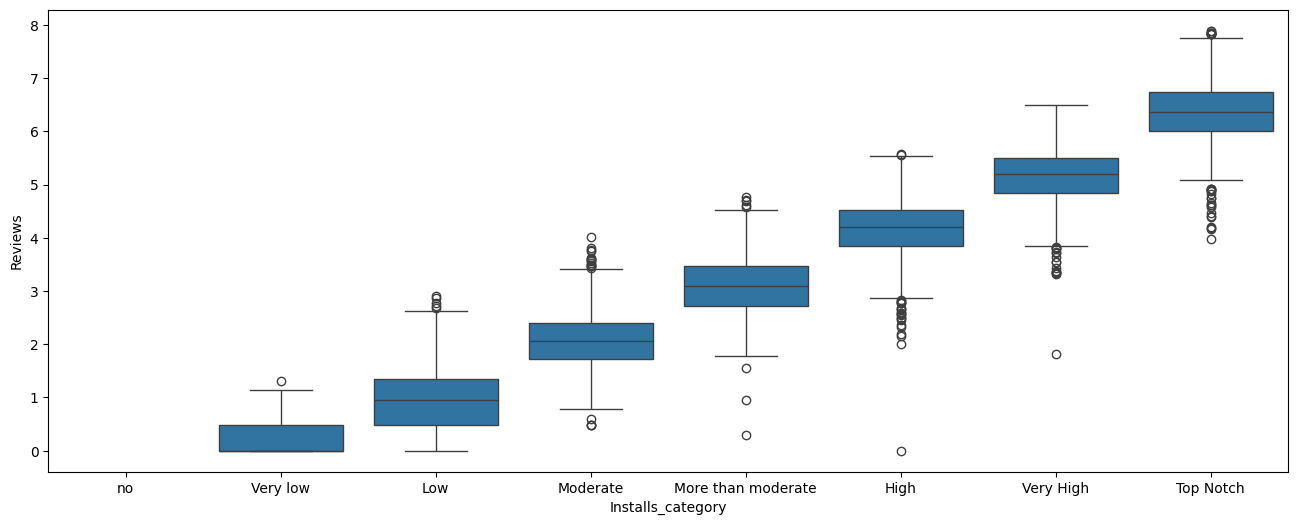

In [62]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

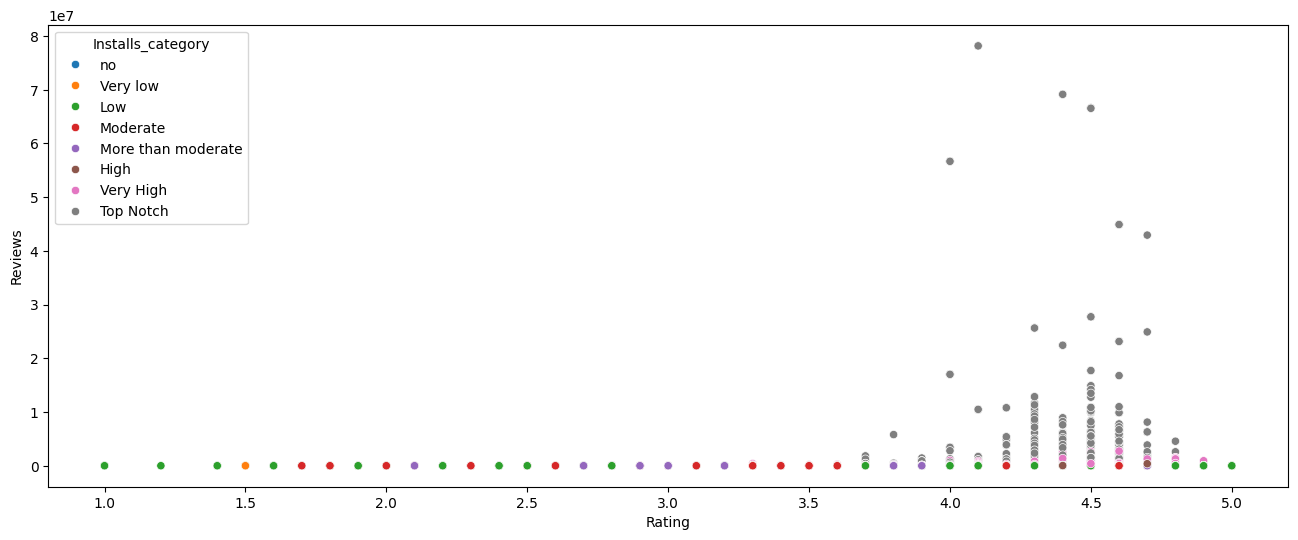

In [63]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

<Axes: xlabel='Reviews', ylabel='Installs'>

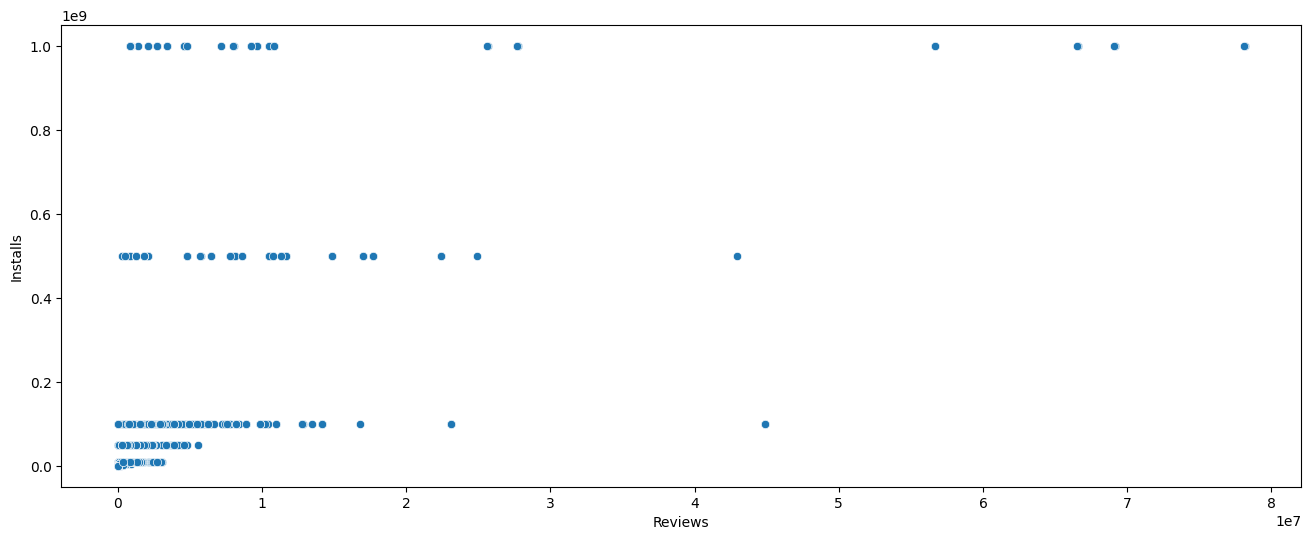

In [64]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

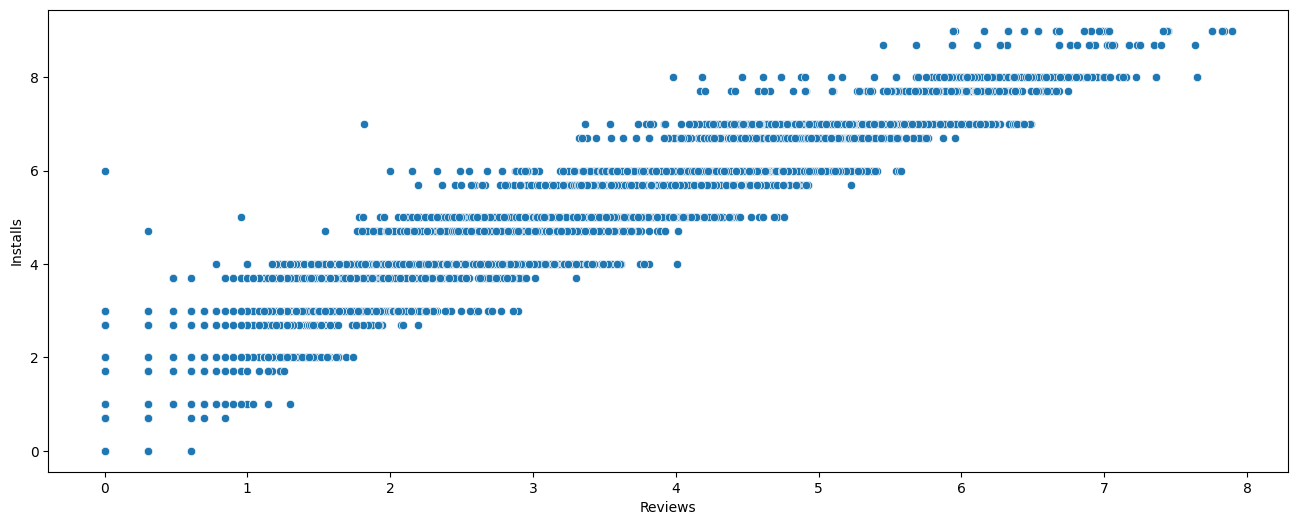

In [65]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

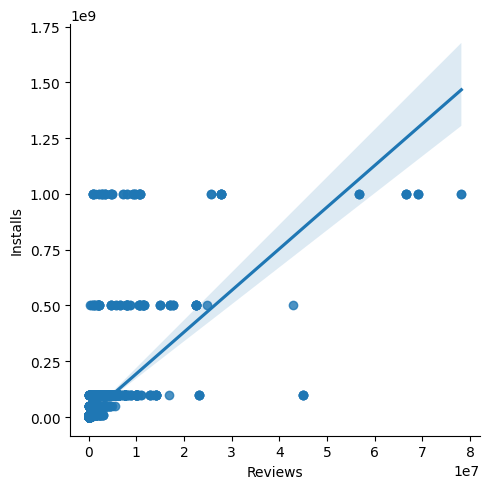

In [66]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [67]:
# find duplicate if any
df.duplicated().sum()

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [68]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [69]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10789
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Installs_category column are: 10821


This means that the only better way to find duplicates is to check for whole data

In [70]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [71]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3984588.8,500000.0,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3984588.8,500000.0,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,27262976.0,1000000.0,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,27262976.0,1000000.0,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3984588.8,1000.0,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,NaN,50000000.0,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,NaN,50000000.0,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848.0,NaN,50000000.0,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,Top Notch
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310.0,39845888.0,10000000.0,Free,0.00,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device,38.0,Very High


- Remove Duplicates

In [72]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [73]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [74]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**

In [75]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  3.154402e+10
COMMUNICATION         2.415228e+10
SOCIAL                1.251387e+10
PRODUCTIVITY          1.246309e+10
TOOLS                 1.145227e+10
FAMILY                1.004163e+10
PHOTOGRAPHY           9.721248e+09
TRAVEL_AND_LOCAL      6.361887e+09
VIDEO_PLAYERS         6.222003e+09
NEWS_AND_MAGAZINES    5.393218e+09
Name: Installs, dtype: float64

# **3.3. Which category has the highest number of reviews?**

In [76]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1.415537e+09
COMMUNICATION      6.012736e+08
SOCIAL             5.335768e+08
FAMILY             3.967717e+08
TOOLS              2.731810e+08
PHOTOGRAPHY        2.042974e+08
VIDEO_PLAYERS      1.103802e+08
PRODUCTIVITY       1.025545e+08
SHOPPING           9.493116e+07
PERSONALIZATION    7.519274e+07
Name: Reviews, dtype: float64

# **3.4. Which category has the highest rating?**

In [77]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

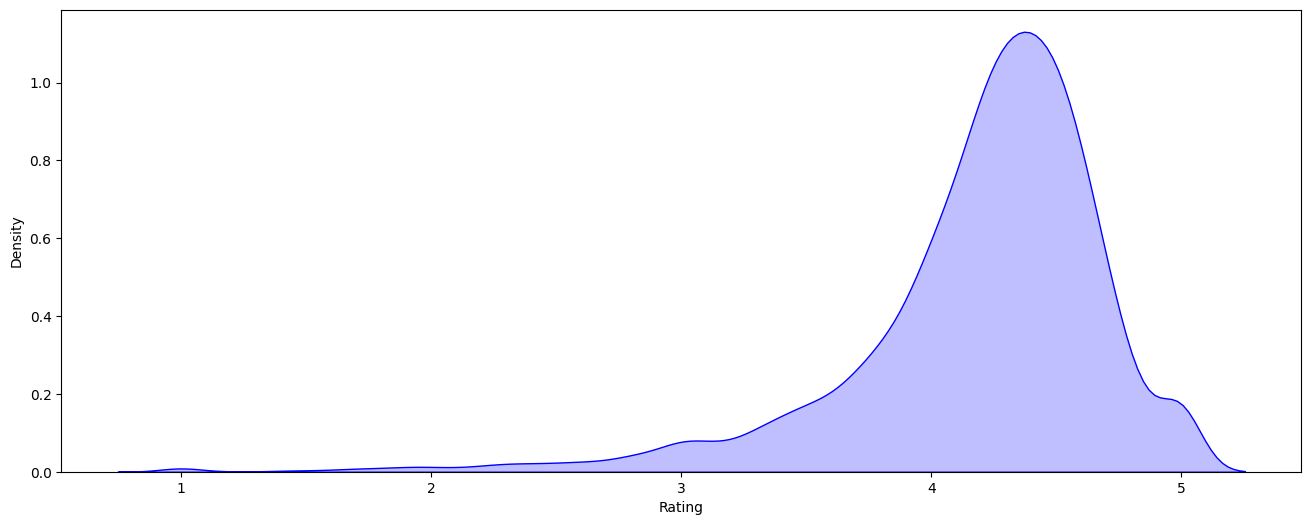

In [78]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

In [79]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


<Axes: xlabel='Installs', ylabel='Price'>

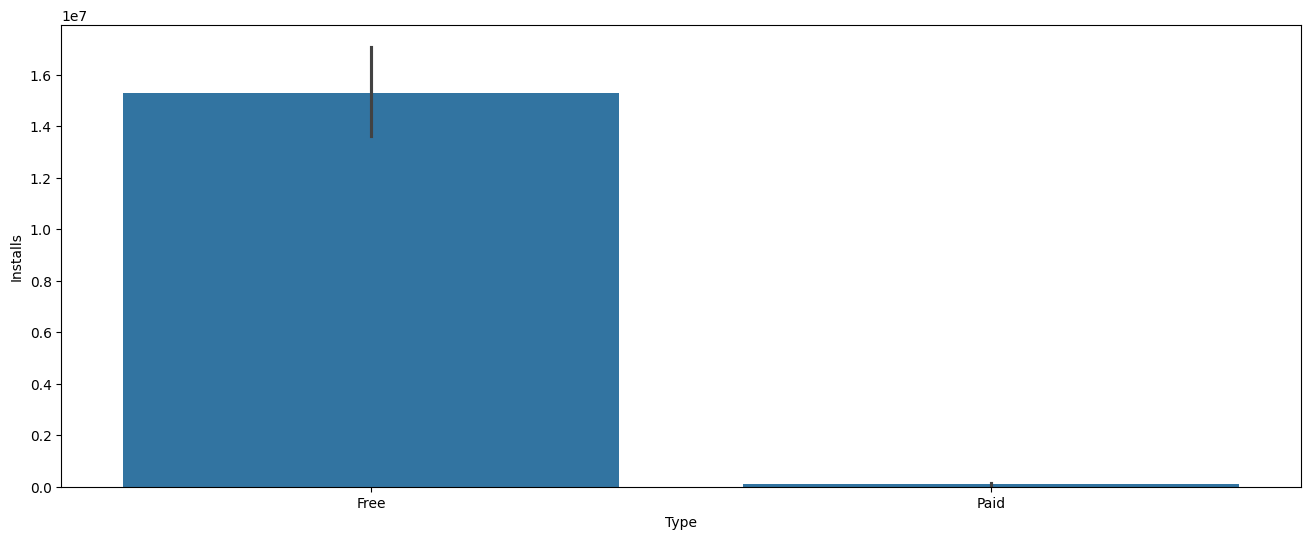

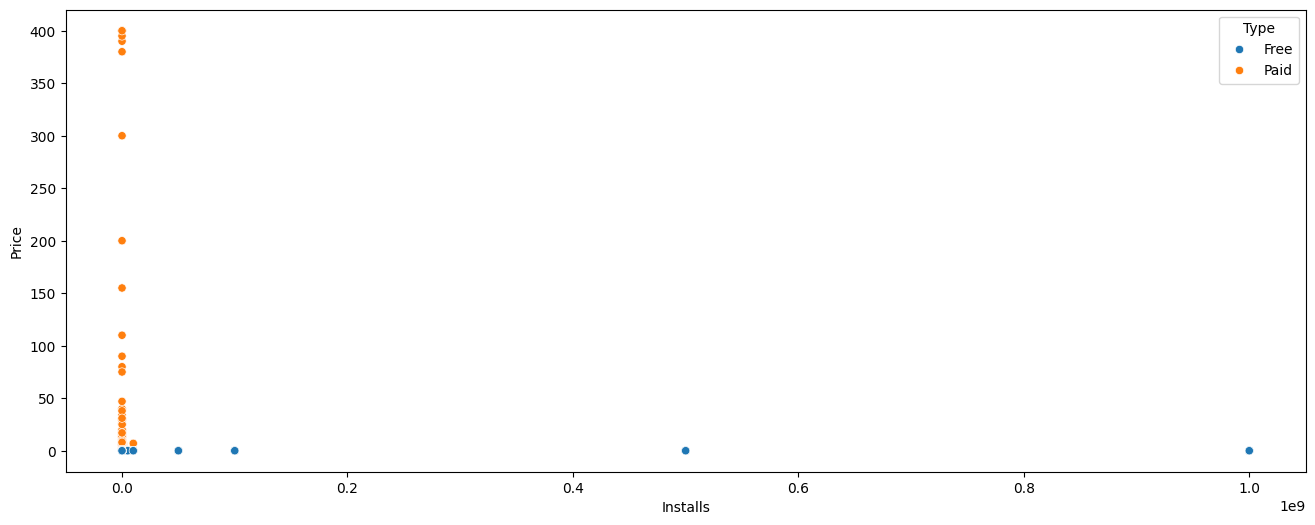

In [80]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

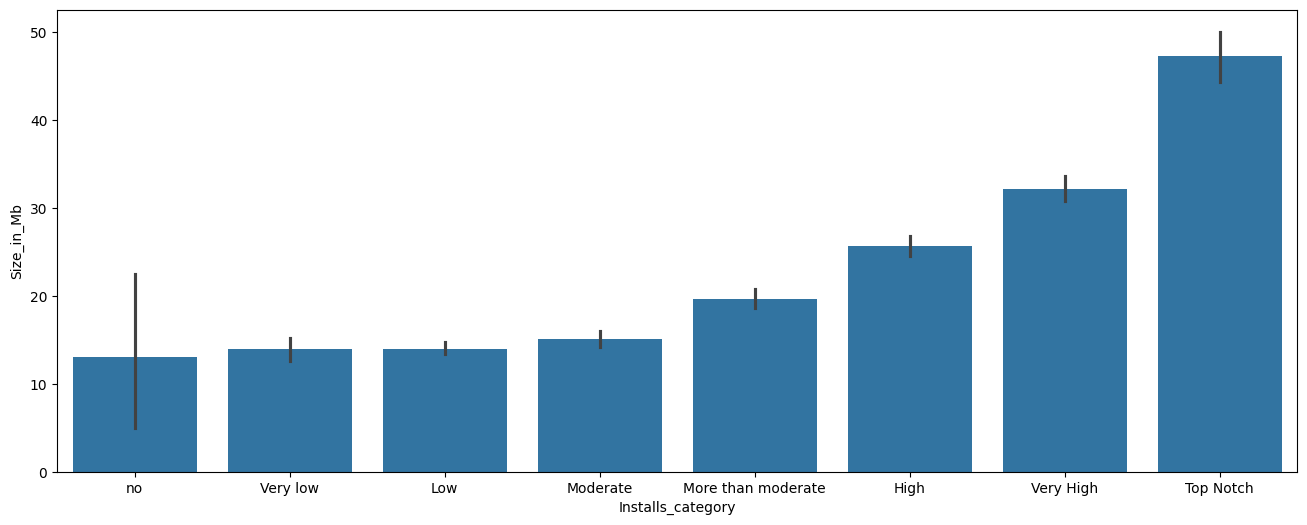

In [81]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

In [82]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

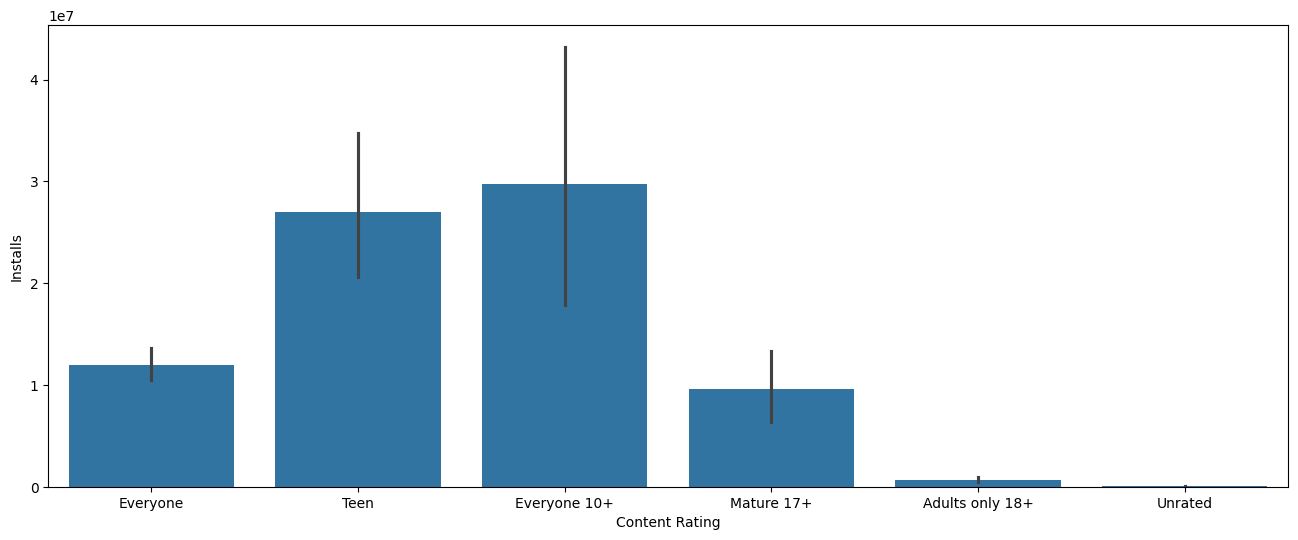

In [83]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [84]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

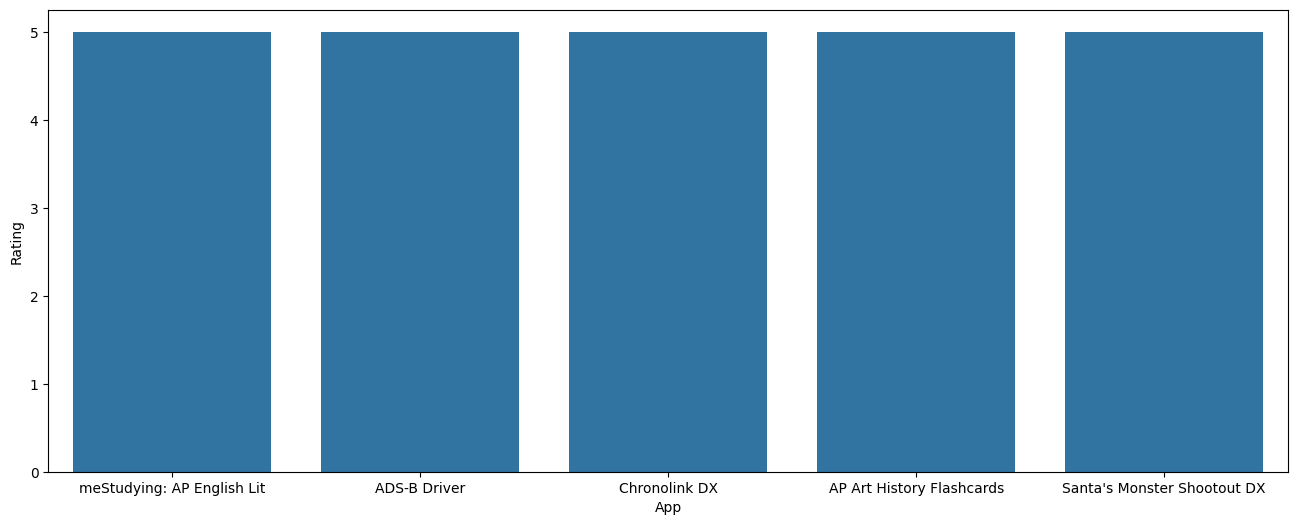

In [85]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [86]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
5482,meStudying: AP English Lit,FAMILY,5.0,1.0,670720.0,10.0,Paid,4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,0.639648,Very low
3957,ADS-B Driver,TOOLS,5.0,2.0,6606028.8,100.0,Paid,1.99,Everyone,Tools,"May 15, 2018",1.19,4.4 and up,6.300000,Low
9039,Chronolink DX,FAMILY,5.0,7.0,76546048.0,10.0,Paid,0.99,Everyone,Puzzle,"July 6, 2017",1.2,4.1 and up,73.000000,Very low
5489,AP Art History Flashcards,FAMILY,5.0,1.0,100663296.0,10.0,Paid,29.99,Mature 17+,Education,"January 19, 2016",3.30,4.0 and up,96.000000,Very low
9056,Santa's Monster Shootout DX,GAME,5.0,4.0,34603008.0,50.0,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,33.000000,Low


<Axes: xlabel='App', ylabel='Rating'>

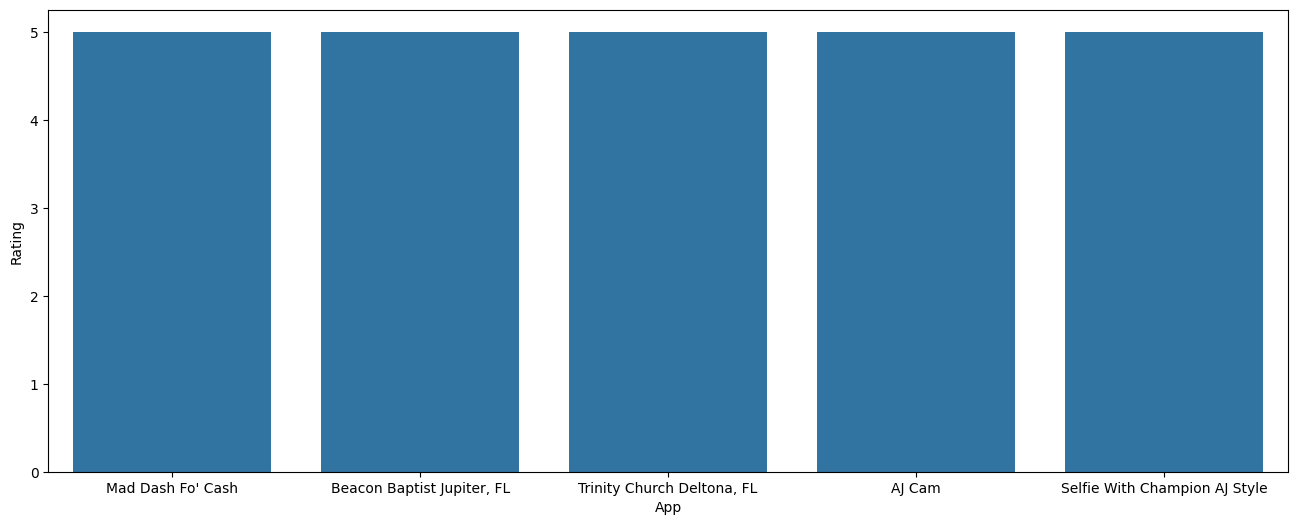

In [87]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [88]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
10721,Mad Dash Fo' Cash,GAME,5.0,14.0,16777216.0,100.0,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,16.0,Low
10611,"Beacon Baptist Jupiter, FL",LIFESTYLE,5.0,14.0,2726297.6,100.0,Free,0.0,Everyone,Lifestyle,"October 13, 2017",2.4,4.0.3 and up,2.6,Low
10609,"Trinity Church Deltona, FL",LIFESTYLE,5.0,33.0,29360128.0,500.0,Free,0.0,Everyone,Lifestyle,"May 7, 2018",1.9.0.0,2.3.3 and up,28.0,Low
5230,AJ Cam,PHOTOGRAPHY,5.0,44.0,2936012.8,100.0,Free,0.0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up,2.8,Low
5238,Selfie With Champion AJ Style,PHOTOGRAPHY,5.0,2.0,7864320.0,500.0,Free,0.0,Everyone,Photography,"January 8, 2018",1.0,3.2 and up,7.5,Low


<Axes: xlabel='App', ylabel='Reviews'>

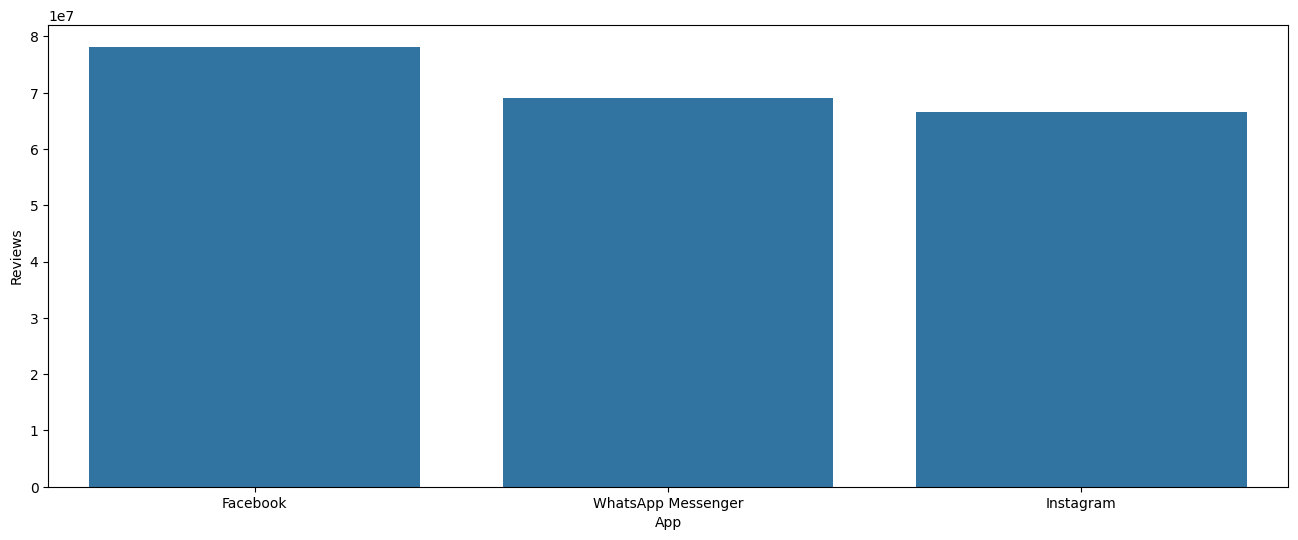

In [89]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [90]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

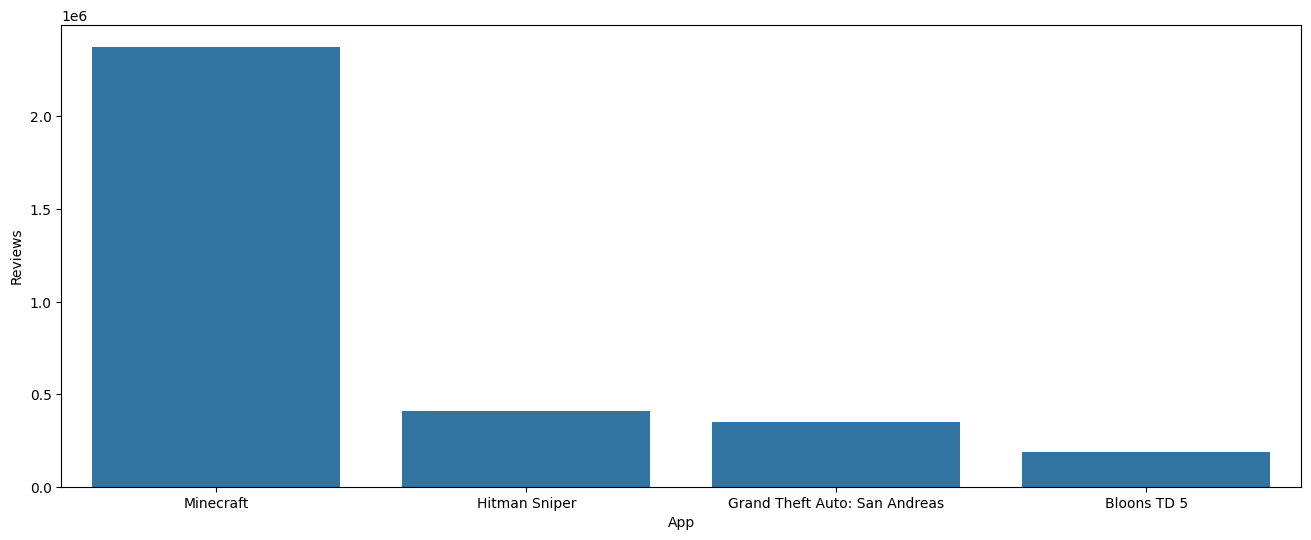

In [91]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

## **Linear Regression**

**What is Linear Regression ?**

Linear Regression is a supervised machine learning algorithm used to predict a continuous numerical value.
It tries to find the best-fit straight line that represents the relationship between:

i. Independent variables (features X)

ii. Dependent variable (target Y)

**Mathematical Formula**

The prediction is made using the equation :-     Y = mX + C

For multiple features :-   Y = b0 ​+ b1​X1​ + b2​X2 ​+ ⋯ + bn​Xn​

where:
Y → predicted output 
X1, X2, ..., Xn → input features    
b0 → intercept             
b1, b2, ..., bn → weights/coefficients (learned from data)

**Goal**

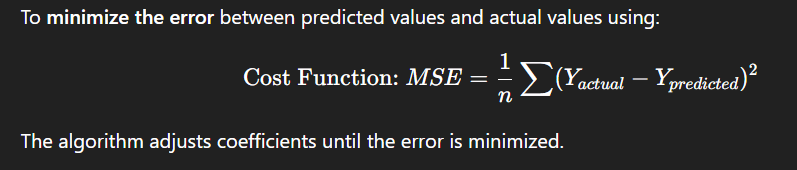

The algorithm adjusts coefficients until the error is minimized.

In [92]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [93]:
# 1. Load your existing dataset (df already loaded)
df_ml = df.copy()     # dataset in project
print("Shape before cleaning:",df_ml.shape)

Shape before cleaning: (10346, 15)


In [94]:
# 2. Apply IQR Outlier Removal on Numeric Columns

numeric_cols = df_ml.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df_ml[col].quantile(0.25)
    Q3 = df_ml[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Keep only non-outliers
    df_ml = df_ml[(df_ml[col] >= lower) & (df_ml[col] <= upper)]

print("✔ Outliers removed using IQR.")
print("Shape after outlier removal:",df_ml.shape)

✔ Outliers removed using IQR.
Shape after outlier removal: (4424, 15)


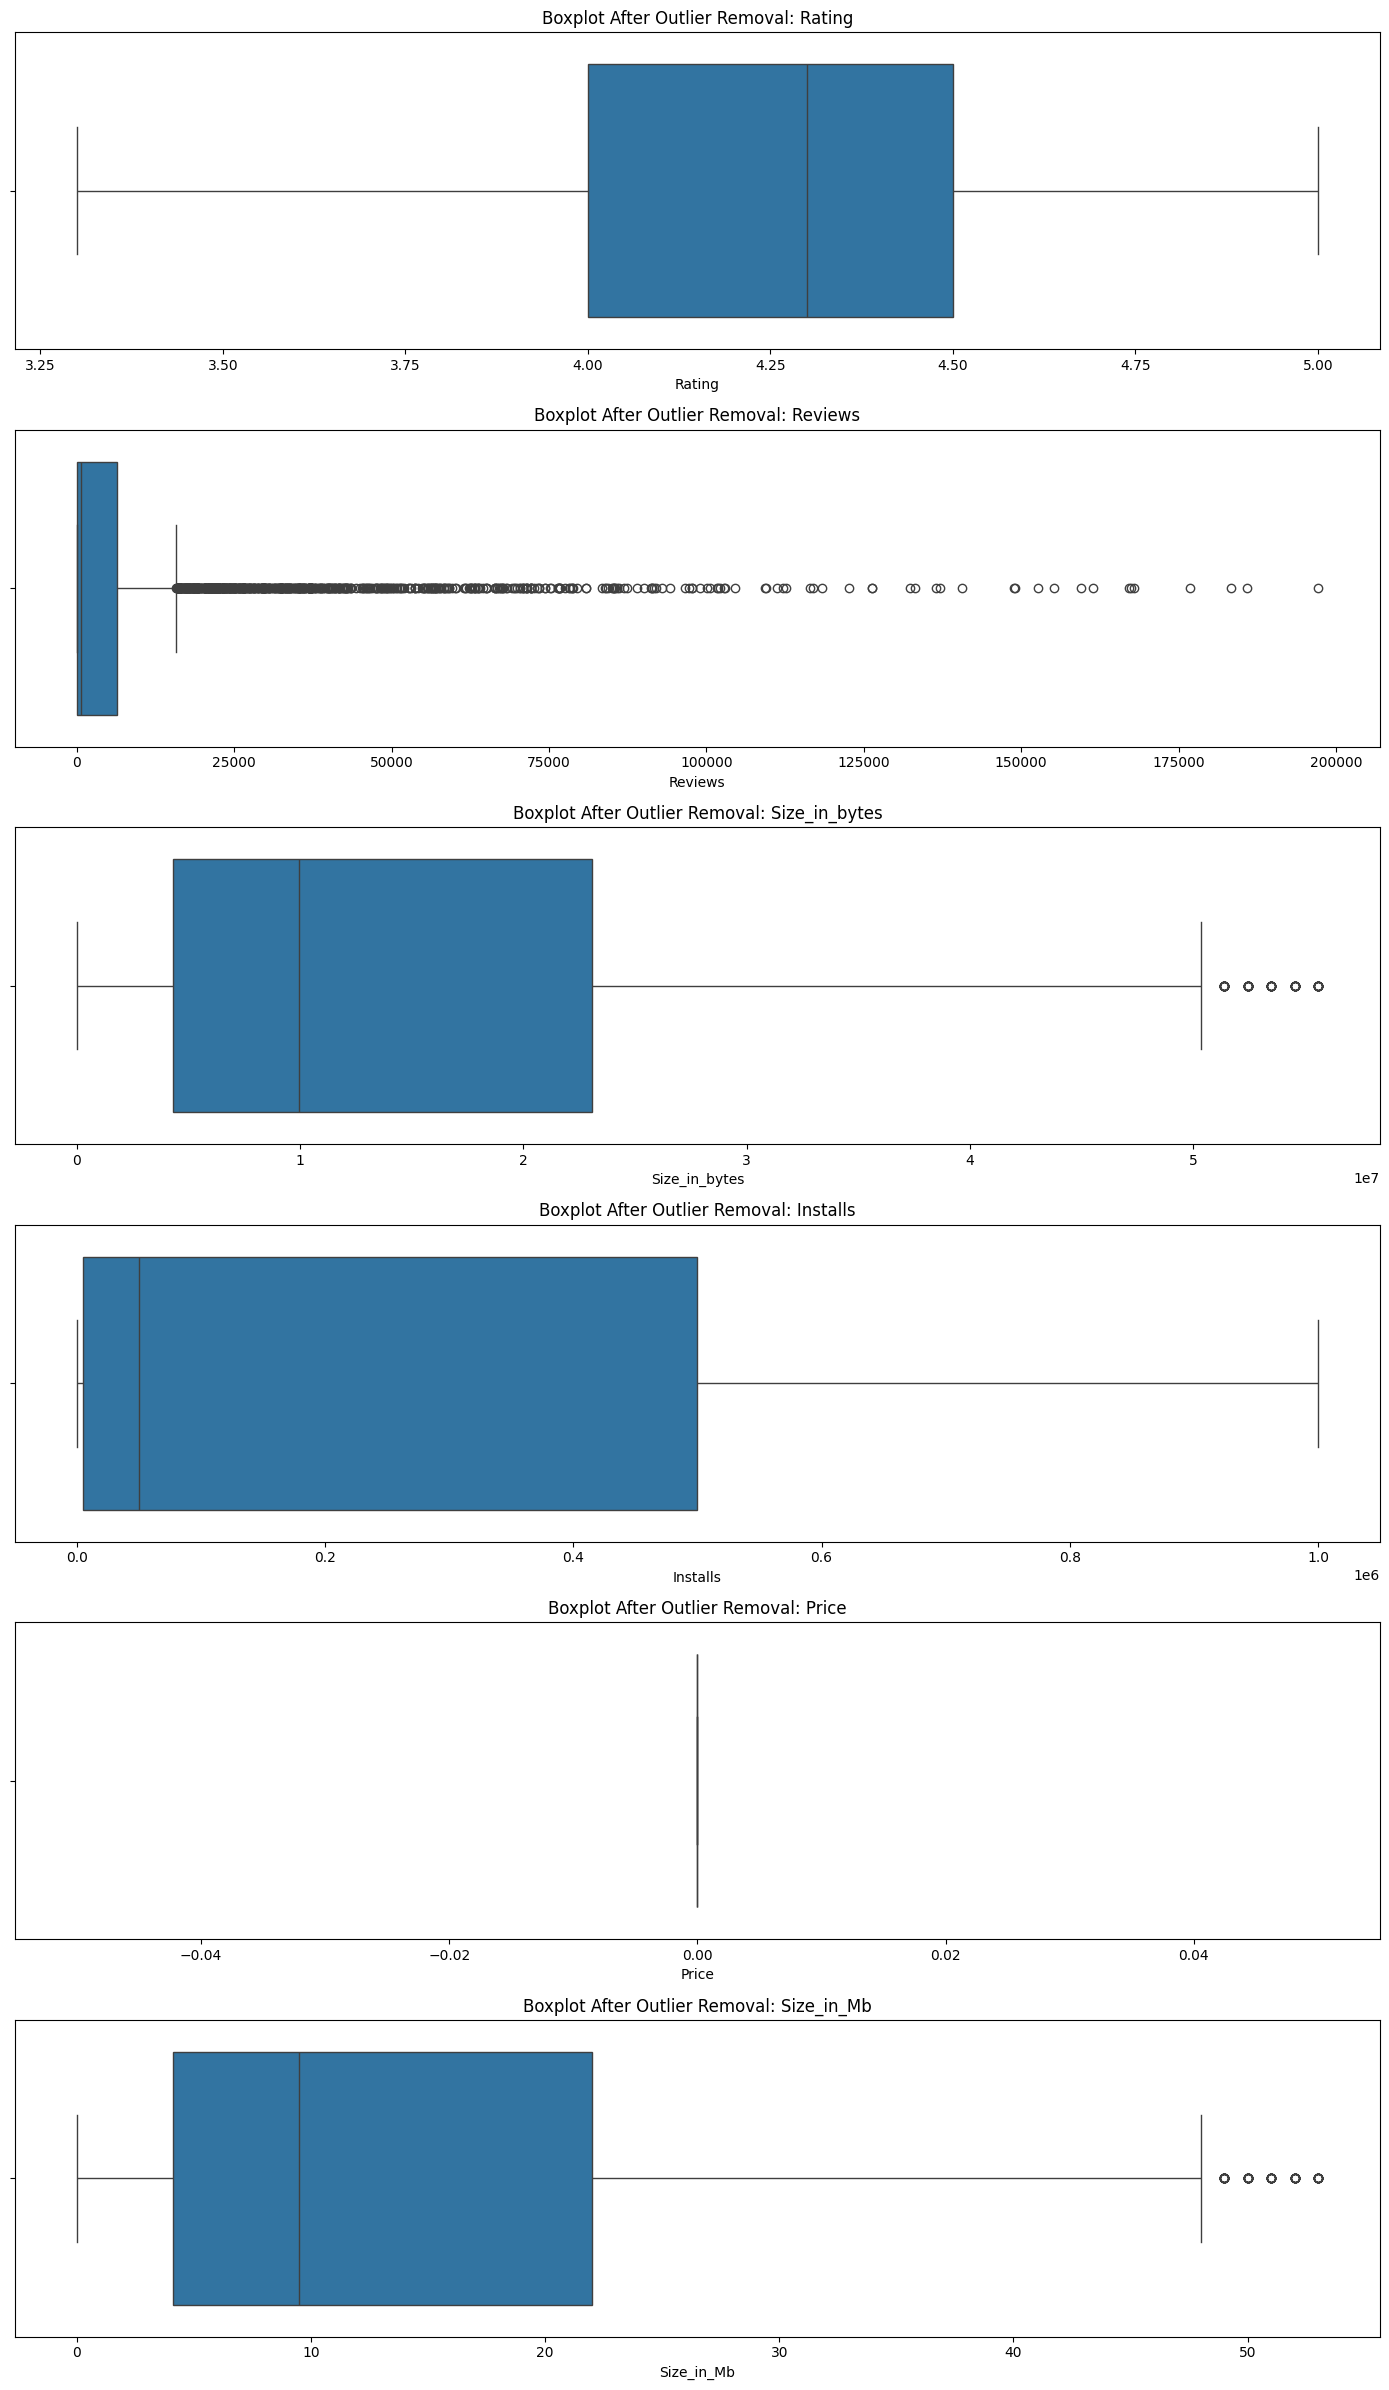

In [95]:
# 3. Boxplot generated after outlier removal

plt.figure(figsize=(14, 4 * len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df_ml[col])
    plt.title(f"Boxplot After Outlier Removal: {col}")

plt.tight_layout()
plt.show()

In [96]:
# 4. Label Encode All Categorical Columns
from sklearn.preprocessing import LabelEncoder
df_encoded = df_ml.copy()
categorical_cols = df_ml.select_dtypes(include=['object']).columns
le_dict = {}  # to store encoders
le = LabelEncoder()
for col in categorical_cols:
    try :
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    except :
          print(f"Skipping column {col} due to encoding error")
print("✔ All categorical columns Label Encoded.")

✔ All categorical columns Label Encoded.


In [97]:
df_ml.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5872025.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.6,More than moderate
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19922944.0,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19.0,More than moderate


In [98]:
# 5. Select Features(X) and Target(y)
# Feature -> all except Installs
# Target -> only Installs
if "Installs" not in df_encoded.columns:
    raise ValueError("❌ Column 'Installs' not found in dataframe!")

X = df_encoded.drop(columns=["Installs"])
y = df_encoded["Installs"]

print("✔ Features & Target created.")
print("Features",X.columns.tolist())

✔ Features & Target created.
Features ['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category']


In [99]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("✔ Train/Test split complete.")

✔ Train/Test split complete.


In [100]:
from sklearn.preprocessing import StandardScaler
# X_train, X_test must be pandas DataFrames (as in your pipeline)
# 1) Identify numeric columns (safe)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# 2) If none found, try converting numeric-like object columns (optional)
if len(numeric_cols) == 0:
    numeric_cols = []
    for col in X_train.columns:
        converted = pd.to_numeric(X_train[col], errors='coerce')
        # treat column as numeric if most values convert successfully
        if converted.notna().mean() > 0.9:
            X_train[col] = converted
            X_test[col]  = pd.to_numeric(X_test[col], errors='coerce')
            numeric_cols.append(col)
print("Numeric columns to be scaled:", numeric_cols)

# 3) Fill NaNs in numeric cols with train median (prevents StandardScaler errors)
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()
if numeric_cols:
    medians = X_train[numeric_cols].median()
    X_train_num = X_train[numeric_cols].fillna(medians)
    X_test_num  = X_test[numeric_cols].fillna(medians)  # use train medians

    scaler = StandardScaler()
    X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_num.astype(float))
    X_test_scaled[numeric_cols]  = scaler.transform(X_test_num.astype(float))
else:
    # nothing numeric to scale
    print("No numeric columns detected — skipping scaling step.")

print("✔ Standard scaling applied to numeric columns. DataFrames preserved.")

Numeric columns to be scaled: ['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Size_in_Mb']
✔ Standard scaling applied to numeric columns. DataFrames preserved.


In [103]:
# 8. Linear Regression Model
# Ensure all X values are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fix NaN
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure y_train is 1D
y_train = y_train.squeeze()

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 9. Evaluate
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📌 MODEL PERFORMANCE (Installs Prediction)")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}  <-- Higher is better")




📌 MODEL PERFORMANCE (Installs Prediction)
RMSE: 4.8078
R² Score: 0.0023  <-- Higher is better


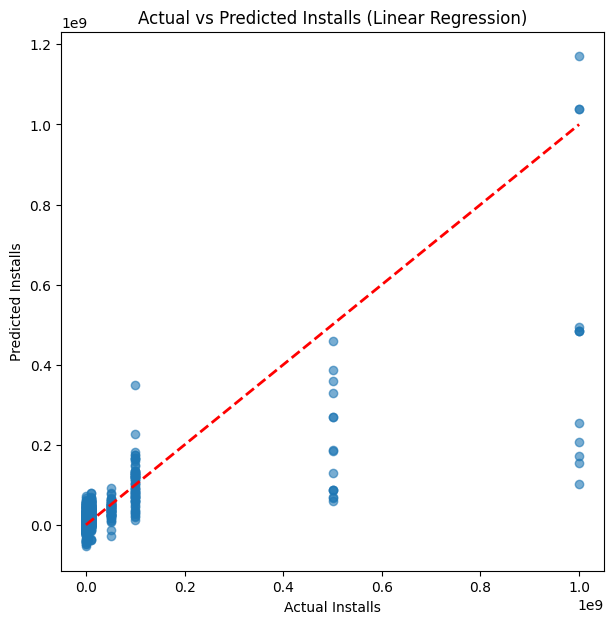

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Installs")
plt.ylabel("Predicted Installs")
plt.title("Actual vs Predicted Installs (Linear Regression)")
plt.show()